<a href="https://colab.research.google.com/github/rubel-47/Image-classification-using-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) =  datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

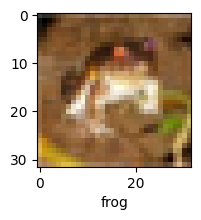

In [9]:
plot_sample(X_train,y_train,0)

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [12]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [14]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 2.2032 - accuracy: 0.2284
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5347 - accuracy: 0.4471
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2980 - accuracy: 0.5409
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1726 - accuracy: 0.5881
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0813 - accuracy: 0.6225
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0162 - accuracy: 0.6472
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9575 - accuracy: 0.6654
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9142 - accuracy: 0.6818
Epoch 9/10
1563/1563 [==============================] - 41s 27ms/step - loss: 0.8695 - accuracy: 0.6949
Epoch 10/10
1563/1563 [==============================] - 42s 27m

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.1239 - accuracy: 0.6445


[1.1238791942596436, 0.6445000171661377]

In [16]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [17]:
y_test = y_test.reshape(-1,)

In [18]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

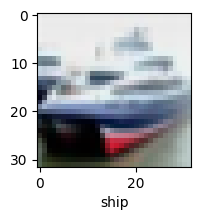

In [19]:
plot_sample(X_test,y_test,1)

In [20]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [21]:
y_pred[:5]

array([[3.6359301e-03, 7.6325289e-03, 3.1873193e-02, 4.0852115e-01,
        6.1021284e-03, 7.1110062e-02, 3.7466028e-01, 3.5745525e-03,
        7.5013347e-02, 1.7876923e-02],
       [7.3413933e-03, 2.6421936e-03, 8.2691152e-08, 1.2621720e-07,
        3.2968535e-07, 1.0779616e-10, 1.7619636e-08, 2.1456819e-09,
        9.8988146e-01, 1.3445283e-04],
       [3.9826397e-02, 9.6362188e-02, 1.4584542e-03, 2.4673447e-03,
        5.6480372e-04, 1.2334123e-04, 5.0820335e-04, 2.0389244e-04,
        7.3117214e-01, 1.2731314e-01],
       [4.1392446e-01, 7.7023320e-03, 9.2448213e-04, 2.9427189e-04,
        6.1519101e-04, 3.6975933e-05, 8.6111271e-05, 3.2538184e-04,
        5.7583040e-01, 2.6042518e-04],
       [6.1045306e-05, 5.5687223e-04, 4.1907657e-02, 4.9535740e-02,
        2.3411137e-01, 7.0728719e-02, 5.9982425e-01, 2.9123349e-03,
        1.4898980e-04, 2.1296889e-04]], dtype=float32)

In [22]:
np.argmax([1,2,3,70])

3

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

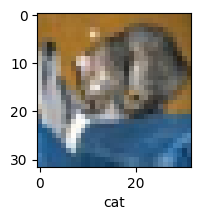

In [28]:
plot_sample(X_test,y_test,0)

In [29]:
classes[y_classes[0]]

'cat'

In [32]:
from sklearn.metrics import classification_report
print("Classification Report\n : ",classification_report(y_test,y_classes))

Classification Report
 :                precision    recall  f1-score   support

           0       0.71      0.67      0.69      1000
           1       0.87      0.69      0.77      1000
           2       0.58      0.49      0.53      1000
           3       0.45      0.43      0.44      1000
           4       0.60      0.56      0.58      1000
           5       0.54      0.55      0.54      1000
           6       0.78      0.67      0.72      1000
           7       0.61      0.78      0.69      1000
           8       0.68      0.80      0.74      1000
           9       0.66      0.81      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

